# GaP-Dirichlet sparsity vs total-power concentration: notes and plots

## Problem statement

We start from independent gamma variables

$$

\theta_i \sim \mathrm{Gamma}\Big(\tfrac{\alpha}{I},\ \text{rate}=\alpha\Big),\quad i=1,\dots,I,


$$

with total

$$

T=\sum_{i=1}^I \theta_i \sim \mathrm{Gamma}(\alpha,\ \text{rate}=\alpha),\qquad \mathbb{E}[T]=1,\quad \mathrm{sd}(T)=\alpha^{-1/2}.


$$

Normalizing gives $p_i=\theta_i/T$ and

$$

p=(p_1,\ldots,p_I)\sim \mathrm{Dirichlet}\Big(\tfrac{\alpha}{I},\ldots,\tfrac{\alpha}{I}\Big).


$$

Define entropy $H(p)=-\sum_i p_i\log p_i$ (natural logs) and the effective number of active components

$$

I_{\mathrm{eff}} := \exp\big(\mathbb{E}[H(p)]\big)


$$

We want to understand how $I_{\mathrm{eff}}  \in [1, I]$ scales with $(I,\alpha)$ and what $\alpha$ choices keep sparsity while keeping $T$ tightly concentrated near $1$. We want the latter because $\nu_w$, which premultiplies the $\theta_i$s, should be the predominant power scale such that total power $\nu_w T \sim O(1)$.

---

## Reasoning and conclusions

The exact formula

$$

\mathbb{E}[H(p)] = \psi(\alpha+1) - \psi\Big(1+\tfrac{\alpha}{I}\Big),


$$

implies the **saturation** phenomenon: for fixed $\alpha=O(1)$ and $I\to\infty$,

$$

I_{\mathrm{eff}} \to \exp\big(\psi(\alpha+1)+\gamma\big),


$$

a constant depending only on $\alpha$ (here $\psi$ is digamma and $\gamma$ is Euler’s constant). In particular, at $\alpha=1$,

$$

I_{\mathrm{eff}}\to e \approx 2.718.


$$

Thus, **increasing $I$ does not increase $I_{\mathrm{eff}}$ once $\alpha$ is fixed: $\alpha$ determines an absolute of effective components, not relative**. Conversely, for large $\alpha$ with fixed $I$, a standard expansion gives

$$

\mathbb{E}[H(p)] \approx \log I - \frac{I-1}{2\alpha},\qquad

I_{\mathrm{eff}} \approx I\,\exp\!\Big(-\frac{I-1}{2\alpha}\Big),


$$

so $I_{\mathrm{eff}}$ **saturates to $I$** as $\alpha\to\infty$.

Two goals are in tension:

(i) Larger $\alpha$ shrinks $\mathrm{sd}(T)=\alpha^{-1/2}$, making $T$ closer to $1$.

(ii) Larger $\alpha$ increases $I_{\mathrm{eff}}$, destroying sparsity.

A key and somewhat surprising calibration is the **"handful-active" line** $I_{\mathrm{eff}}=e$, i.e.

$$

\psi(\alpha+1) - \psi\Big(1+\tfrac{\alpha}{I}\Big) = 1.


$$

This has a unique solution $\alpha^*(I)$ with $\alpha^*(I)\downarrow 1$ very quickly in $I$:

for $I\in\{5,50,500\}$, $\alpha^*\approx\{2.0855,\,1.0538,\,1.0051\}$.

Near this crossing the response of $I_{\mathrm{eff}}$ to $\alpha$ is locally a power law

$$

I_{\mathrm{eff}}(\alpha;I) \approx e\left(\frac{\alpha}{\alpha^*(I)}\right)^{b(I)},

\qquad b(I)=\alpha^*(I)\left[\psi_1(\alpha^*(I)+1) - \frac{1}{I}\psi_1\Big(1+\frac{\alpha^*(I)}{I}\Big)\right].


$$

For moderate/large $I$, $b(I)\to \psi_1(2)=\pi^2/6 - 1 \approx 0.6449$, so **locally**

$$

I_{\mathrm{eff}} \propto \alpha^{0.645}.


$$

**Scaling**. Decision tension around $\alpha=1$. Doubling $\alpha$ near the $I_eff := e$ crossing increases $I_{\mathrm{eff}}$ by a factor $\approx 2^{0.645}\approx 1.56$ while reducing $\mathrm{sd}(T)$ by $2^{-1/2}\approx 0.707$. For large $I$, the sparsity loss is comparatively steep, so **$\alpha\simeq 1$ is a robust default** if one wants a few active components on average while keeping $T$ reasonably tight. There is **some leeway only for very small $I$** (e.g. $I\approx 5$), where the local exponent is smaller ($b\approx 0.38$).

**Connection to Yoshii and Goto (2013).** The widely used setting $\alpha=1$ in their prior sits exactly on the $I_{\mathrm{eff}}\approx e$ calibration for large $I$; it is a principled choice that yields roughly a handful of active components in expectation across a wide range of $I$, while keeping $T$ mean-one and reasonably concentrated.

Importantly, the extreme sparsity target $I_{\mathrm{eff}}=1$ is **unsatisfiable** for $I>1$ and $\alpha>0$, because digamma is strictly increasing:

$\psi(\alpha+1)>\psi(1+\alpha/I)$. Only $\alpha\to 0$ collapses to a vertex and gives $\mathbb{E}[H]=0$.

So set $I_eff := e$ to say: we expect a "handful" of active components.


## Appendix: detailed derivations and references

1.  **Dirichlet expected entropy.** For $p\sim\mathrm{Dirichlet}(\alpha_1,\ldots,\alpha_I)$ and $\alpha_0=\sum_i \alpha_i$,

$$

\mathbb{E}[H(p)] = \psi(\alpha_0+1) - \sum_{i=1}^I \frac{\alpha_i}{\alpha_0}\,\psi(\alpha_i+1).


$$

In the symmetric case $\alpha_i=\alpha/I$ this reduces to

$$

\mathbb{E}[H(p)] = \psi(\alpha+1) - \psi\Big(1+\tfrac{\alpha}{I}\Big).


$$

A quick derivation uses the Beta marginal $p_i\sim\mathrm{Beta}(\alpha_i,\alpha_0-\alpha_i)$ and

$\mathbb{E}[p_i\log p_i] = \tfrac{\alpha_i}{\alpha_0}\big[\psi(\alpha_i+1)-\psi(\alpha_0+1)\big]$.

2.  **Large-$I$ saturation (fixed $\alpha$).** As $I\to\infty$, $\psi(1+\alpha/I)\to \psi(1)=-\gamma$, giving

$$

\mathbb{E}[H]\to \psi(\alpha+1)+\gamma,\qquad I_{\mathrm{eff}}\to \exp\big(\psi(\alpha+1)+\gamma\big).


$$

3.  **Large-$\alpha$ at fixed $I$.** Using $\psi(x)=\log x - \tfrac{1}{2x} + O(x^{-2})$,

$$

\mathbb{E}[H] = \log I - \frac{I-1}{2\alpha} + O(\alpha^{-2}),\qquad

I_{\mathrm{eff}} \approx I\,\exp\!\Big(-\frac{I-1}{2\alpha}\Big).


$$

4.  **No solution for $I_{\mathrm{eff}}=1$ at $I>1$.** We have

$$

\mathbb{E}[H]=0 \iff \psi(\alpha+1)=\psi\Big(1+\tfrac{\alpha}{I}\Big)

\iff \alpha+1=1+\tfrac{\alpha}{I}


$$

by strict monotonicity of $\psi$. For $I>1$ this forces $\alpha=0$.

5.  **"Handful-active" calibration $I_{\mathrm{eff}}=e$.** Solve

$$

\psi(\alpha+1)-\psi\Big(1+\tfrac{\alpha}{I}\Big)=1.


$$

The solution $\alpha^*(I)$ has the large-$I$ expansion

$$

\alpha^*(I) = 1 + \frac{a}{I} + \frac{b}{I^2} + O(I^{-3}),\quad

a=\frac{\psi_1(1)}{\psi_1(2)}=\frac{\pi^2/6}{\pi^2/6-1},\quad

b=\frac{\psi_1(1)a + \tfrac{1}{2}\psi_2(1) - \tfrac{1}{2}\psi_2(2)a^2}{\psi_1(2)}.


$$

Numerically, $a\approx 2.5502$, $b\approx 6.6792$; by $I\gtrsim 50$ this approximation is essentially exact.

6.  **Local power-law slope $b(I)$.** Define the elasticity

$$

b(\alpha;I) := \frac{\partial\log I_{\mathrm{eff}}}{\partial\log \alpha}

= \alpha\left[\psi_1(\alpha+1) - \frac{1}{I}\psi_1\Big(1+\frac{\alpha}{I}\Big)\right].


$$

Evaluated at $\alpha^*(I)$, this gives the local power law

$$

I_{\mathrm{eff}}(\alpha;I) \approx e\left(\frac{\alpha}{\alpha^*(I)}\right)^{b(I)},\qquad

b(I):=b(\alpha^*(I);I).


$$

For large $I$, $b(I)\to \psi_1(2)=\pi^2/6 - 1 \approx 0.6449$.

7.  **References.**

- Minka, T. (2000, rev. 2003), "Estimating a Dirichlet distribution". PDF: https://tminka.github.io/papers/dirichlet/minka-dirichlet.pdf

- Yoshii, K., and Goto, M. (2013), "Infinite kernel linear prediction for joint estimation of spectral envelope and fundamental frequency". ISMIR 2013. (Background motivation for the $\alpha=1$ prior used in audio models.)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import digamma, findroot, gamma, polygamma


def E_H(alpha, I):
    """Exact E[H(p)] for symmetric Dirichlet(alpha/I) with natural logs."""
    return float(digamma(alpha + 1.0) - digamma(1.0 + alpha / I))


def I_eff(alpha, I):
    """I_eff = exp(E[H]). Accepts scalar alpha; returns scalar."""
    return float(np.exp(E_H(alpha, I)))


def b_elasticity(alpha, I):
    """Local elasticity b = d log I_eff / d log alpha."""
    return float(
        alpha
        * (
            polygamma(1, alpha + 1.0)
            - (1.0 / I) * polygamma(1, 1.0 + alpha / I)
        )
    )


def solve_alpha_for_EH1(I):
    """Solve psi(alpha+1) - psi(1 + alpha/I) = 1."""
    lo, hi = 1e-12, 1.0
    # bracket
    while E_H(hi, I) < 1.0:
        hi *= 2.0
        if hi > 1e8:
            raise RuntimeError("Failed to bracket root for EH=1.")
    # root
    try:
        return float(findroot(lambda x: E_H(x, I) - 1.0, (lo, hi)))
    except Exception:
        # fallback bisection
        for _ in range(200):
            mid = 0.5 * (lo + hi)
            if E_H(mid, I) < 1.0:
                lo = mid
            else:
                hi = mid
        return 0.5 * (lo + hi)


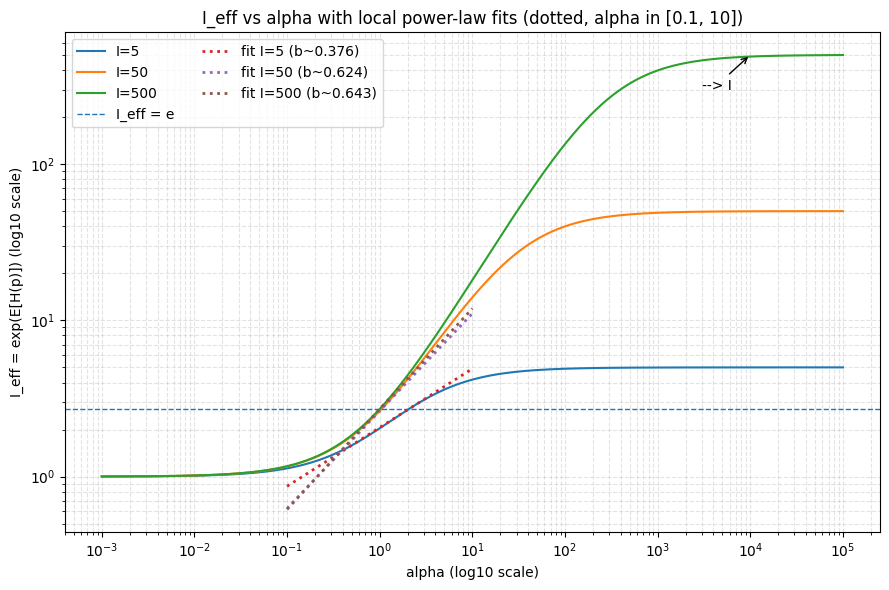

In [ ]:
Is = [5, 50, 500]
alpha_full = np.logspace(-3, 5, 800)  # wide range for context
alpha_seg = np.logspace(-1, 1, 200)  # [0.1, 10] for dotted fits

plt.figure(figsize=(9, 6))
for I in Is:
    y = [I_eff(a, I) for a in alpha_full]
    plt.loglog(alpha_full, y, label=f"I={I}")

# Horizontal line at I_eff = e
plt.axhline(np.e, linestyle="--", linewidth=1, label="I_eff = e")

# Overlay regressed local power-law fits
for I in Is:
    a_star = solve_alpha_for_EH1(I)
    b_loc = b_elasticity(a_star, I)
    y_reg = np.e * (alpha_seg / a_star) ** b_loc
    plt.loglog(
        alpha_seg,
        y_reg,
        linestyle=":",
        linewidth=2,
        label=f"fit I={I} (b~{b_loc:.3f})",
    )

# Annotate saturation trend for large I
plt.annotate(
    "--> I",
    xy=(1e4, 500),
    xycoords="data",
    xytext=(3e3, 300),
    textcoords="data",
    arrowprops=dict(arrowstyle="->", lw=1),
)

plt.xlabel("alpha (log10 scale)")
plt.ylabel("I_eff = exp(E[H(p)]) (log10 scale)")
plt.title(
    "I_eff vs alpha with local power-law fits (dotted, alpha in [0.1, 10])"
)
plt.legend(ncol=2)
plt.grid(True, which="both", linestyle="--", alpha=0.35)
plt.tight_layout()
# plt.savefig("Ieff_with_fits.png", dpi=160)


The above plot shows the behavior of the expected number of active components for given $I, \alpha$. Essentially for moderate $I > O(10)$ we have always $\alpha = 1$, the default of the paper.

The dotted regression laws show local power laws $I_\text{eff} \sim \alpha^b$ where $b \approx 0.64$ for moderate $I$. These show us the gains and losses when increasing $\alpha$. To get at $\alpha = 1 \rightarrow \alpha = 4$, we get $0.1 < T < 10$ behavior of $T$ while the expected number of active components $I_\text{eff} \rightarrow \times 4$. **Thus we need to try some hyperparam optimization as the rewards may be great.**


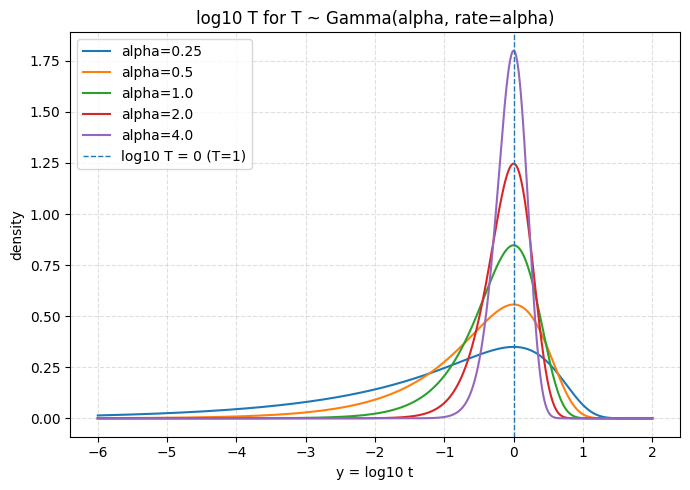

In [ ]:
def log10T_pdf_grid(y_grid, alpha):
    # For Y = log10 T:
    # f_Y(y) = ln(10) * alpha^alpha / Gamma(alpha) * 10**(alpha*y) * exp(-alpha * 10**y)
    ln10 = np.log(10.0)
    c = (alpha**alpha) * ln10 / float(gamma(alpha))
    return c * np.exp(ln10 * alpha * y_grid - alpha * np.power(10.0, y_grid))


alphas_T = [0.25, 0.5, 1.0, 2.0, 4.0]  # illustrative
ys = np.linspace(-6.0, 2.0, 1000)  # y = log10 t

plt.figure(figsize=(7, 5))
for a in alphas_T:
    ypdf = log10T_pdf_grid(ys, a)
    plt.plot(ys, ypdf, label=f"alpha={a}")

plt.axvline(0.0, linestyle="--", linewidth=1, label="log10 T = 0 (T=1)")

plt.xlabel("y = log10 t")
plt.ylabel("density")
plt.title("log10 T for T ~ Gamma(alpha, rate=alpha)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
# plt.savefig("log10T_pdfs.png", dpi=160)
